In [42]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")


5.0

In [104]:
## Import train/test split 
from sklearn.model_selection import train_test_split



## Import our data with pandas
import pandas as pd

df = pd.read_csv(r'creditcard.csv')
print (df)
np_vers=df.to_numpy()


X=np_vers[:,0:30]
print('Size of data is: ',str(X.shape))


## Construct the train/test split
## Use random state 471 for reproducibility

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = .15, random_state = 471)
print('There are '+str(len(y_test[y_test==1]))+' entries in our test set with value 1')
print('len(y): '+str(len(y))+' len(y_test): '+str(len(y_test))+' len(y_train): '+str(len(y_train)))

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

In [107]:
## SVMs are scale sensitive
## Use the standard scaler on the data
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline



## Import the classifier
from sklearn.svm import LinearSVC

## Import accuracy measure
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score


## Make arrays where we can store our predictions
pred_array = np.zeros((len(y_test),5))
pred_array_ones = np.zeros((len(y_test[y_test==1]),5))
## Now we make the classifier
## We will try some other C-values as well

list_of_C = [0.01, 0.05, 0.25, 0.5, 0.9]

#create empty accuracy, precision, and recall arrays for plotting

acc = np.zeros((2,5))
prec = np.zeros((2,5))
recall = np.zeros((2,5))
f1 = np.zeros((2,5))

for i in range(0,5):
    max_margin = Pipeline([('scaler',StandardScaler()),('clf',LinearSVC(C=list_of_C[i], loss="hinge",max_iter=60000))])
    #$ Fit the model
    max_margin.fit(X_train,y_train)
    ## Transform the data
    X_test_transformed=max_margin['scaler'].transform(X_test)
    ## Predict on the test data
    pred = max_margin['clf'].predict(X_test_transformed)
    for j in range(len(pred)):
        pred_array[j,i] = pred[j]
    ## Predict on only the fraudulent test data
    pred_only_1 = max_margin['clf'].predict(X_test_transformed[y_test == 1,:])
    for j in range(len(pred_only_1)):
        pred_array_ones[j,i] = pred_only_1[j]
    ## Print the accuracy of our predictions
    print('On '+str(len(y_test))+' entries, our accuracy score is: '+str(accuracy_score(y_test,pred)))
    print('On '+str(len(y_test[y_test==1]))+' entries with only 1\'s our accuracy score is: '+str(accuracy_score(y_test[y_test==1],pred_only_1))+'\n')
    
    print('On '+str(len(y_test))+' entries, our precision score is: '+str(precision_score(y_test,pred)))
    print('On '+str(len(y_test[y_test==1]))+' entries with only 1\'s our precision score is: '+str(precision_score(y_test[y_test==1],pred_only_1))+'\n')
    
    print('On '+str(len(y_test))+' entries, our recall score is: '+str(recall_score(y_test,pred)))
    print('On '+str(len(y_test[y_test==1]))+' entries with only 1\'s our recall score is: '+str(recall_score(y_test[y_test==1],pred_only_1))+'\n')
    
    print('On '+str(len(y_test))+' entries, our f1 score is: '+str(f1_score(y_test,pred)))
    print('On '+str(len(y_test[y_test==1]))+' entries with only 1\'s our f1 score is: '+str(f1_score(y_test[y_test==1],pred_only_1))+'\n')
        
    
    
    ## Update arrays for plotting
    acc[0,i] = accuracy_score(y_test,pred)
    acc[1,i] = accuracy_score(y_test[y_test==1],pred_only_1)
    
    prec[0,i] = precision_score(y_test,pred)
    prec[1,i] = precision_score(y_test[y_test==1],pred_only_1)
    
    recall[0,i] = recall_score(y_test,pred)
    recall[1,i] = recall_score(y_test[y_test==1],pred_only_1)
    
    f1[0,i] = f1_score(y_test,pred)
    f1[1,i] = f1_score(y_test[y_test==1],pred_only_1)


On 42722 entries, our accuracy score is: 0.9991105285333084
On 90 entries with only 1's our accuracy score is: 0.8

On 42722 entries, our precision score is: 0.782608695652174
On 90 entries with only 1's our precision score is: 1.0

On 42722 entries, our recall score is: 0.8
On 90 entries with only 1's our recall score is: 0.8

On 42722 entries, our f1 score is: 0.7912087912087912
On 90 entries with only 1's our f1 score is: 0.888888888888889

On 42722 entries, our accuracy score is: 0.9992041571087495
On 90 entries with only 1's our accuracy score is: 0.8111111111111111

On 42722 entries, our precision score is: 0.8111111111111111
On 90 entries with only 1's our precision score is: 1.0

On 42722 entries, our recall score is: 0.8111111111111111
On 90 entries with only 1's our recall score is: 0.8111111111111111

On 42722 entries, our f1 score is: 0.8111111111111111
On 90 entries with only 1's our f1 score is: 0.8957055214723927



c:\users\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


On 42722 entries, our accuracy score is: 0.9991339356771687
On 90 entries with only 1's our accuracy score is: 0.8111111111111111

On 42722 entries, our precision score is: 0.7849462365591398
On 90 entries with only 1's our precision score is: 1.0

On 42722 entries, our recall score is: 0.8111111111111111
On 90 entries with only 1's our recall score is: 0.8111111111111111

On 42722 entries, our f1 score is: 0.7978142076502732
On 90 entries with only 1's our f1 score is: 0.8957055214723927



c:\users\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


On 42722 entries, our accuracy score is: 0.999157342821029
On 90 entries with only 1's our accuracy score is: 0.8111111111111111

On 42722 entries, our precision score is: 0.7934782608695652
On 90 entries with only 1's our precision score is: 1.0

On 42722 entries, our recall score is: 0.8111111111111111
On 90 entries with only 1's our recall score is: 0.8111111111111111

On 42722 entries, our f1 score is: 0.8021978021978022
On 90 entries with only 1's our f1 score is: 0.8957055214723927

On 42722 entries, our accuracy score is: 0.999157342821029
On 90 entries with only 1's our accuracy score is: 0.8111111111111111

On 42722 entries, our precision score is: 0.7934782608695652
On 90 entries with only 1's our precision score is: 1.0

On 42722 entries, our recall score is: 0.8111111111111111
On 90 entries with only 1's our recall score is: 0.8111111111111111

On 42722 entries, our f1 score is: 0.8021978021978022
On 90 entries with only 1's our f1 score is: 0.8957055214723927



c:\users\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


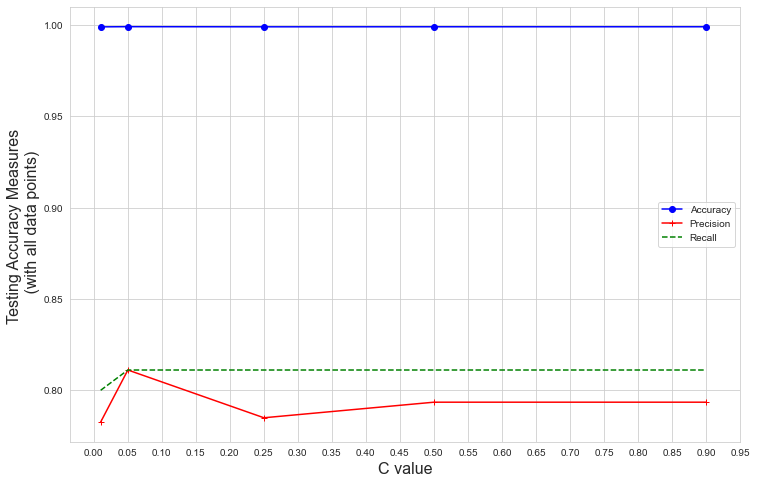

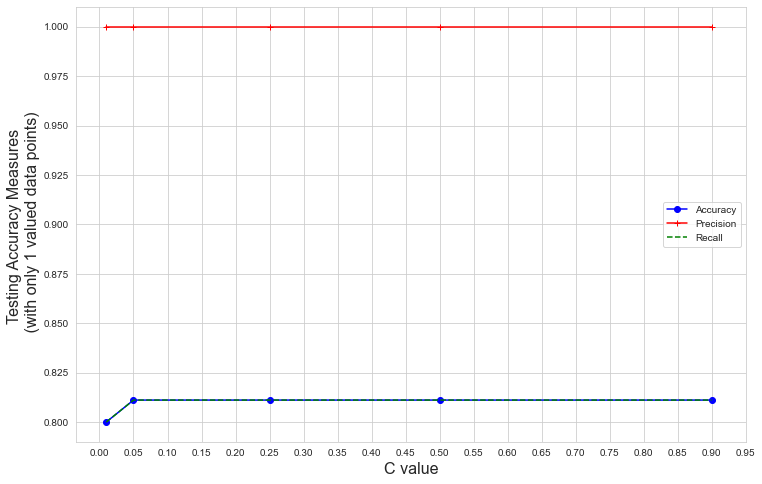

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     42632
         1.0       0.78      0.80      0.79        90

    accuracy                           1.00     42722
   macro avg       0.89      0.90      0.90     42722
weighted avg       1.00      1.00      1.00     42722

 ------------------------------------------------ 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     42632
         1.0       0.81      0.81      0.81        90

    accuracy                           1.00     42722
   macro avg       0.91      0.91      0.91     42722
weighted avg       1.00      1.00      1.00     42722

 ------------------------------------------------ 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     42632
         1.0       0.78      0.81      0.80        90

    accuracy                           1.00     42722
   macro avg       0.89 

In [115]:
## Plot the validation accuracy measures vs. C here (all data version)

plt.figure(figsize=(12,8))

plt.plot(list_of_C, (acc[0,:]),'b-o', label="Accuracy")
plt.plot(list_of_C, (prec[0,:]),'r-+', label="Precision")
plt.plot(list_of_C, (recall[0,:]),'g', label="Recall",linestyle='dashed')


plt.xticks(np.arange(0,1,.05))

plt.xlabel("C value", fontsize=16)
plt.ylabel("Testing Accuracy Measures \n (with all data points)", fontsize=16)


plt.legend()


plt.show()

## Plot the validation accuracy measures vs. C here (only 1's data version)

plt.figure(figsize=(12,8))

plt.plot(list_of_C, (acc[1,:]),'b-o', label="Accuracy")
plt.plot(list_of_C, (prec[1,:]),'r-+', label="Precision")
plt.plot(list_of_C, (recall[1,:]),'g', label="Recall",linestyle='dashed')


plt.xticks(np.arange(0,1,.05))

plt.xlabel("C value", fontsize=16)
plt.ylabel("Testing Accuracy Measures \n (with only 1 valued data points)", fontsize=16)

plt.legend()

plt.show()




# Print out a classification report for each C value

from sklearn.metrics import classification_report

for i in range(0,5):
    print(classification_report(y_test,pred_array[:,i]))
    print(' ------------------------------------------------ \n')
